<a href="https://www.kaggle.com/code/sonawanelalitsunil/forecasting-hourly-bike-rental-demand?scriptVersionId=212618957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [4]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Data Exploration

In [9]:
train.shape

(10886, 10)

In [10]:
test.shape

(6493, 9)

In [11]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [12]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

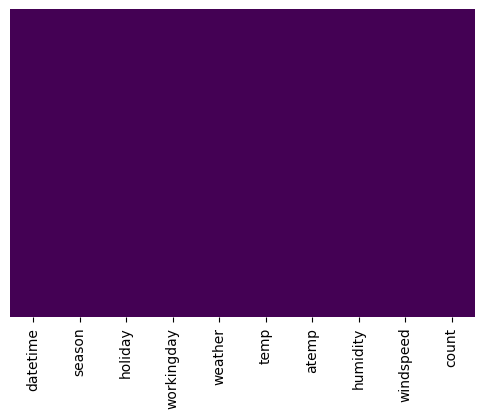

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [16]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

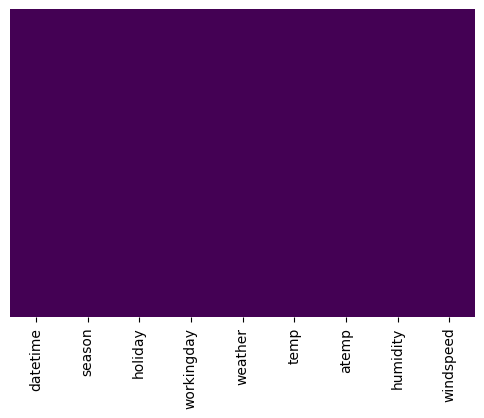

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [18]:
plt.style.use('ggplot')

In [19]:
train.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900


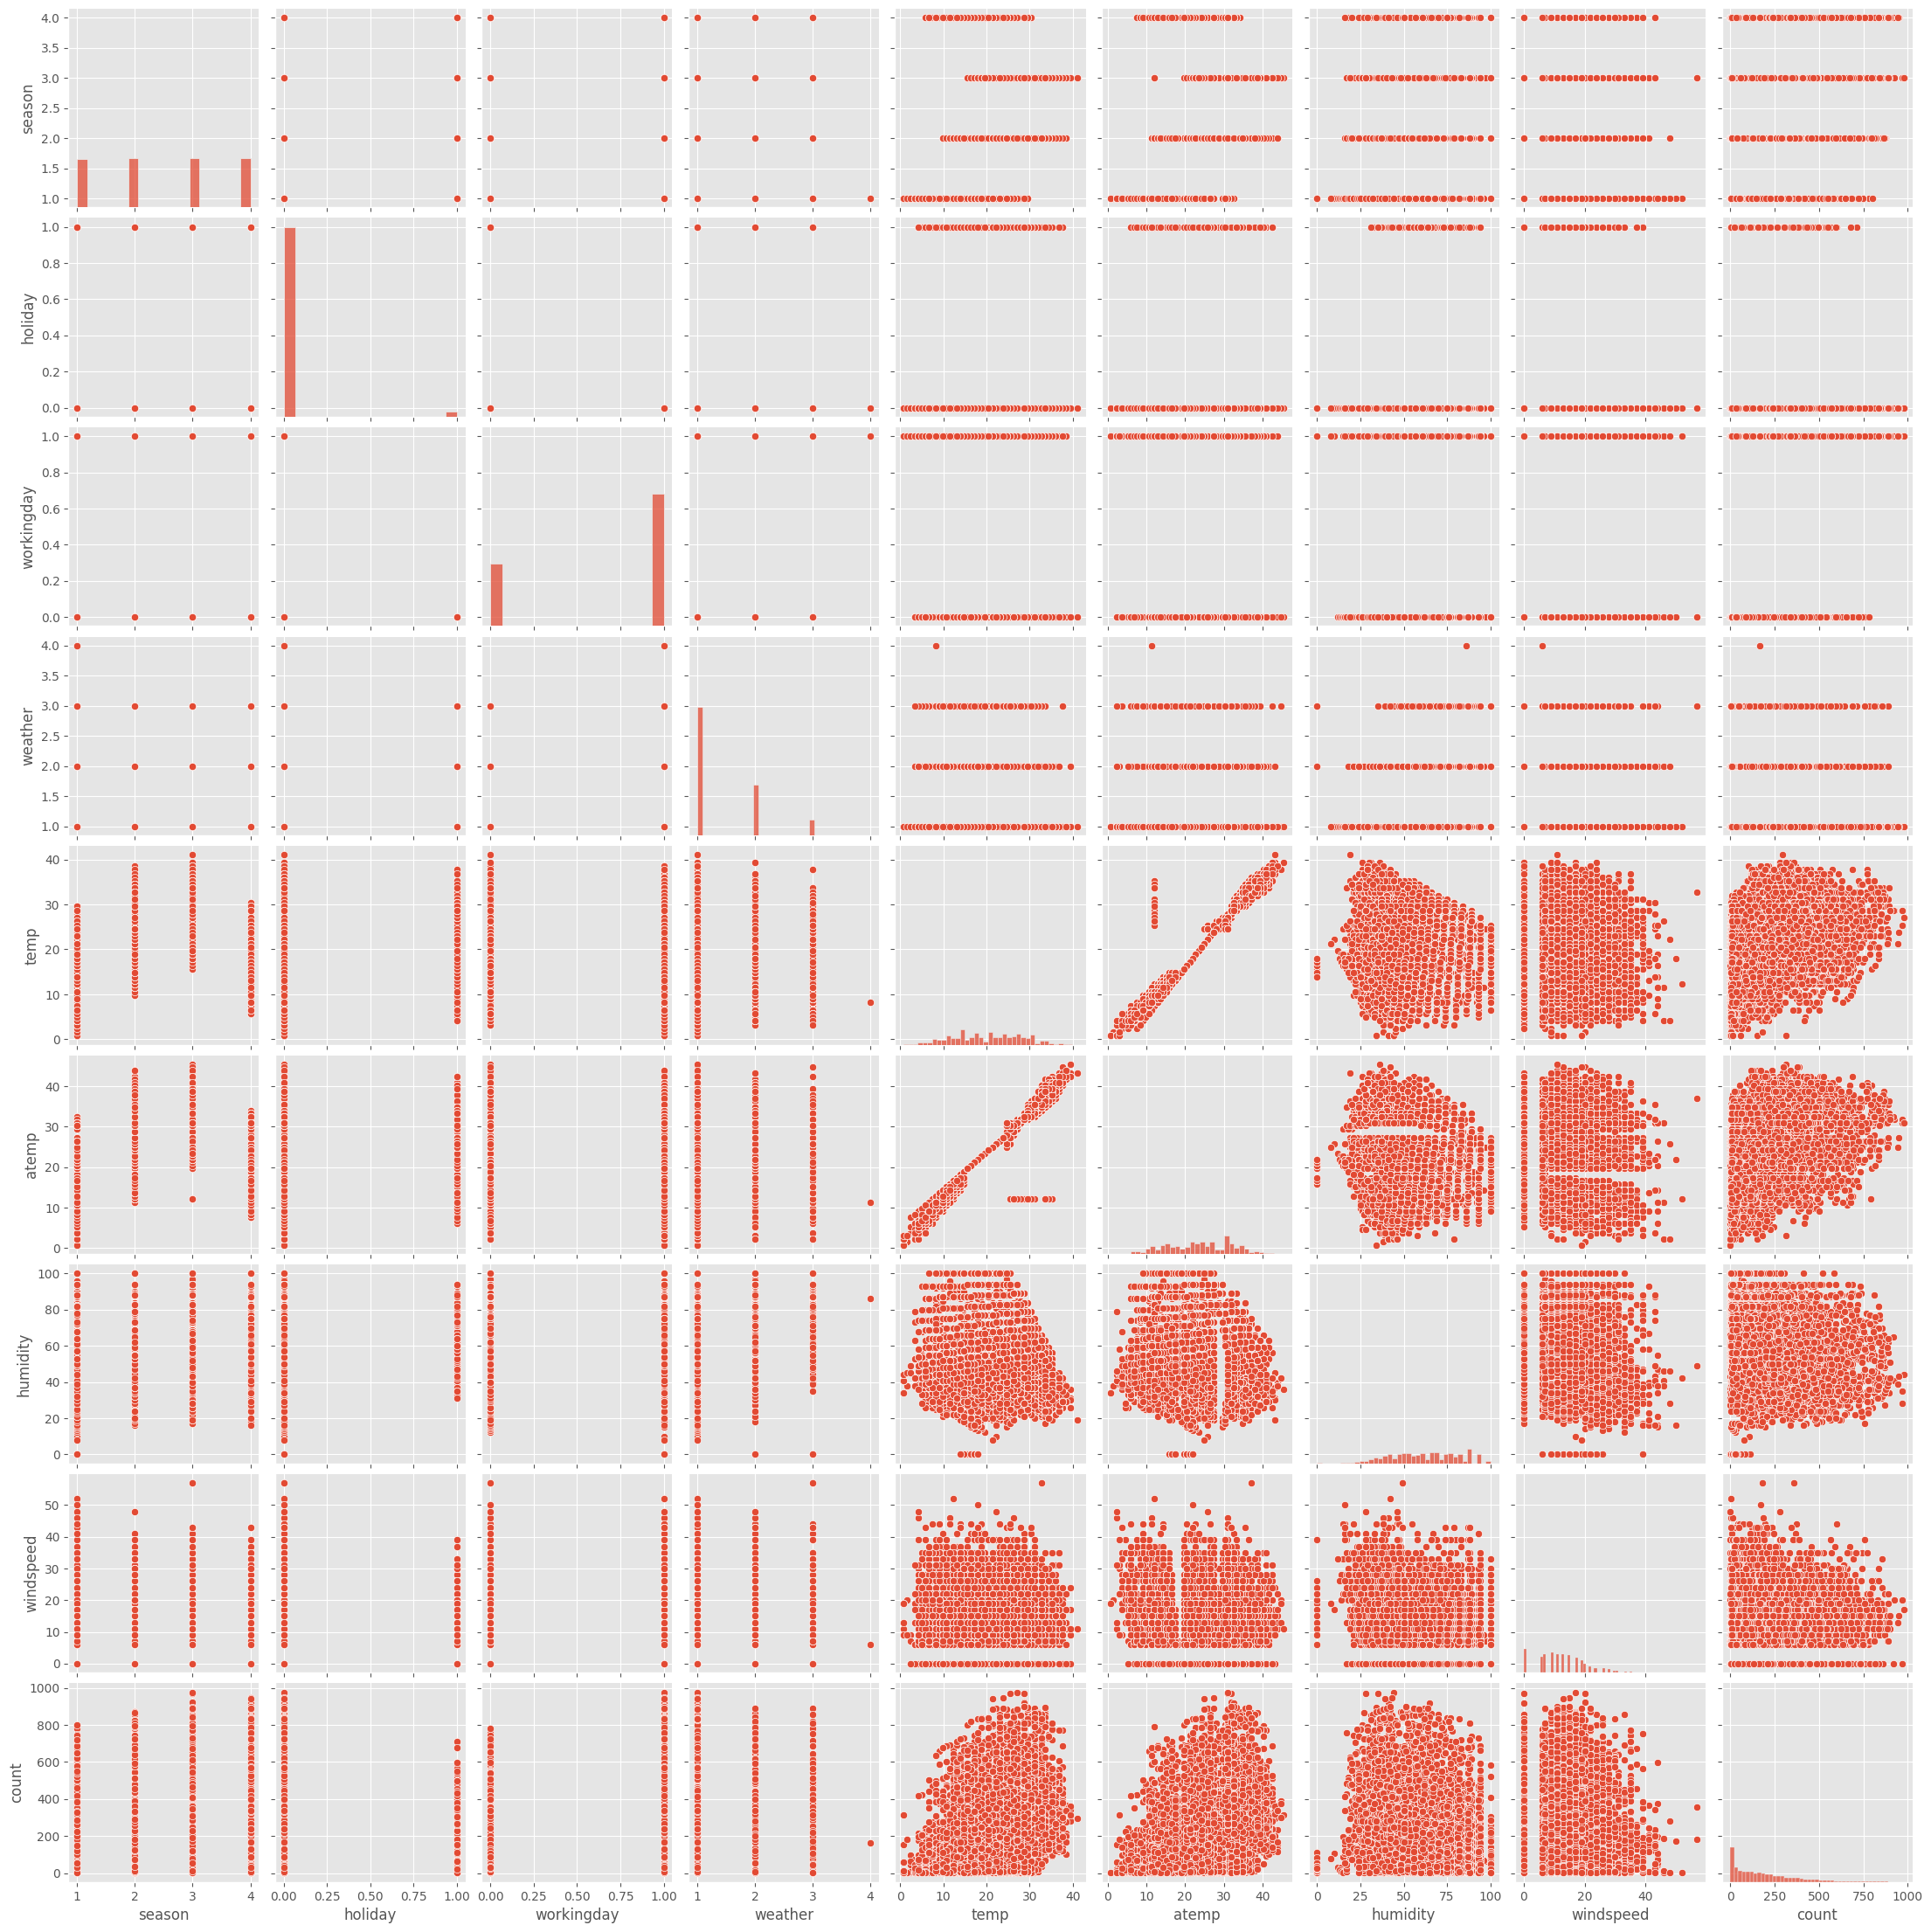

In [20]:
sns.pairplot(train);

### Exploratory Data Analysis

## Univariate Analysis

## Distribution of target variable 'count'

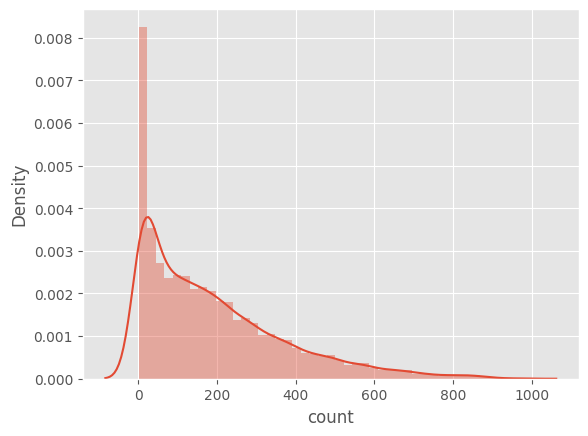

In [21]:
sns.distplot(train['count']);

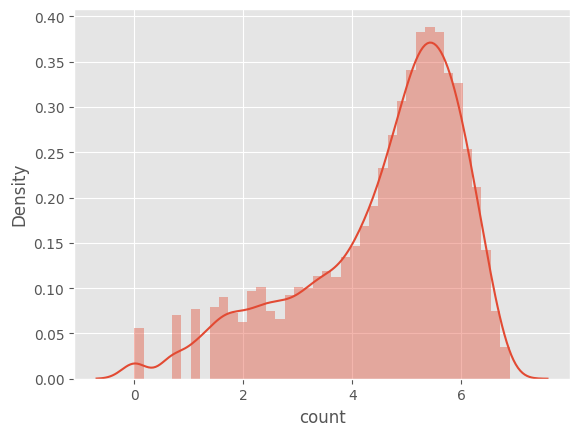

In [22]:
sns.distplot(np.log(train['count']));

## Bivariate Analysis

## Correlation matrix

## Since 'season', 'holiday', 'workingday'and 'weather' are basically categorical variables and 'datetime' is string variable, so we will have to drop these columns in order to determine the correlation matrix.

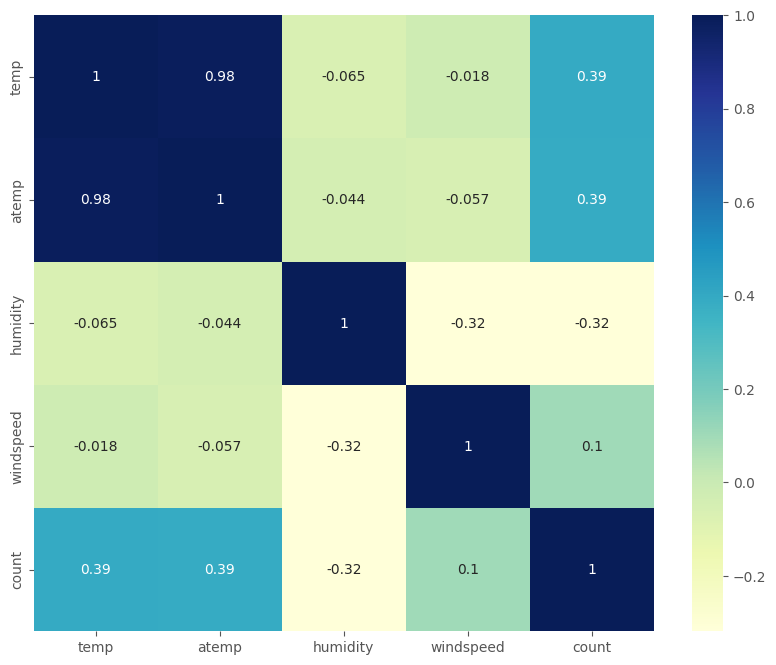

In [23]:
corrdata = train[["temp","atemp","humidity","windspeed","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'YlGnBu');

From the above heatmap we can infer that:

'temp' and 'humidity' have a positive and a negative correlation with 'count' respectively. Eventhough the correlation between them is not that strong but still it is little bit dependent on the 'temp' and 'humidity' variables.

'windspeed' will not be a useful feature since it has got a very low correlation value with the demand (count) so we will have to drop this feature.

Since 'temp' and 'atemp' possess a very strong correlation among themselves, so one of these variable has to be dropped during model building otherwise there will be multi-collinearity in the data.

## Analyzing the datetime column

In [24]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [25]:
test['datetime'] = pd.to_datetime(train['datetime'])

In [26]:
type(train['datetime'][0]), type(test['datetime'][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

## Creating Year, Date, Month, Hour and Day of the week columns for the train dataset

In [27]:
train['year'] = train['datetime'].dt.year

In [28]:
train['month'] = train['datetime'].dt.month

In [29]:
train['date'] = train['datetime'].dt.date

In [30]:
train['hour'] = train['datetime'].dt.hour

In [31]:
train['day of the week'] = train['datetime'].dt.dayofweek

## Creating Date, Month, Hour and Day of the week columns for the test dataset

In [32]:
test['year'] = test['datetime'].dt.year

In [33]:
test['month'] = test['datetime'].dt.month

In [34]:
test['date'] = test['datetime'].dt.date

In [35]:
test['hour'] = test['datetime'].dt.hour

In [36]:
test['day of the week'] = test['datetime'].dt.dayofweek

In [37]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
train['day of the week'] = train['day of the week'].map(dmap)
test['day of the week'] = test['day of the week'].map(dmap)

In [38]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,2011-01-01,0,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,2011-01-01,1,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2011-01-01,2,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,2011-01-01,3,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,2011-01-01,4,Sat


In [39]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,2011-01-01,0,Sat
1,2011-01-01 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2011-01-01,1,Sat
2,2011-01-01 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2011-01-01,2,Sat
3,2011-01-01 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,2011-01-01,3,Sat
4,2011-01-01 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,2011-01-01,4,Sat


In [40]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   count            10886 non-null  int64  
 9   year             10886 non-null  int32  
 10  month            10886 non-null  int32  
 11  date             10886 non-null  object 
 12  hour             10886 non-null  int32  
 13  day of the week  10886 non-null  object 
dtypes: float64(3), int32(3), int64(6), object(2)
memory usage: 1.0+ MB


In [42]:
ymap = {2011:'0',2012:'1'}
train['year'] = train['year'].map(ymap)
test['year'] = test['year'].map(ymap)

In [43]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80,0.0,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80,0.0,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75,0.0,13,0,1,2011-01-01,3,Sat
4,1,0,0,1,9.84,14.395,75,0.0,1,0,1,2011-01-01,4,Sat


In [44]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,hour,day of the week
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011-01-01,0,Sat
1,1,0,1,1,10.66,13.635,56,0.0000,0,1,2011-01-01,1,Sat
2,1,0,1,1,10.66,13.635,56,0.0000,0,1,2011-01-01,2,Sat
3,1,0,1,1,10.66,12.880,56,11.0014,0,1,2011-01-01,3,Sat
4,1,0,1,1,10.66,12.880,56,11.0014,0,1,2011-01-01,4,Sat


In [45]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   count            10886 non-null  int64  
 9   year             10886 non-null  object 
 10  month            10886 non-null  int32  
 11  date             10886 non-null  object 
 12  hour             10886 non-null  int32  
 13  day of the week  10886 non-null  object 
dtypes: float64(3), int32(2), int64(6), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data colu

(None, None)

### Demand per day of the week

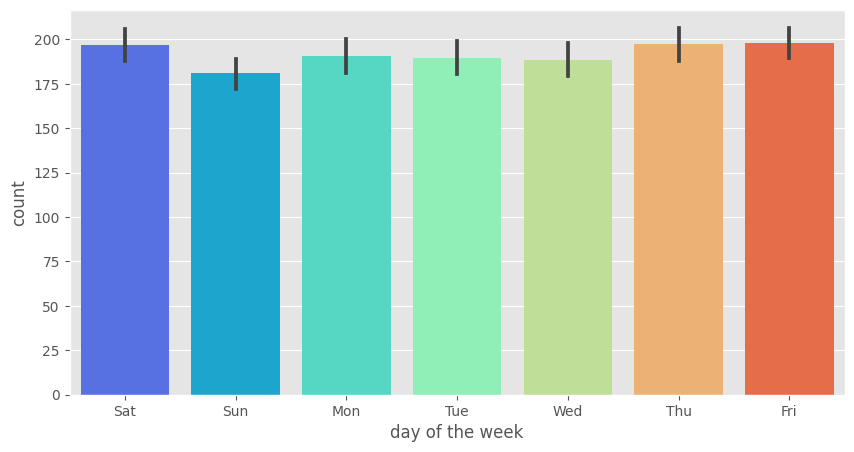

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x = 'day of the week', y = 'count', palette='rainbow');

## Demand per month

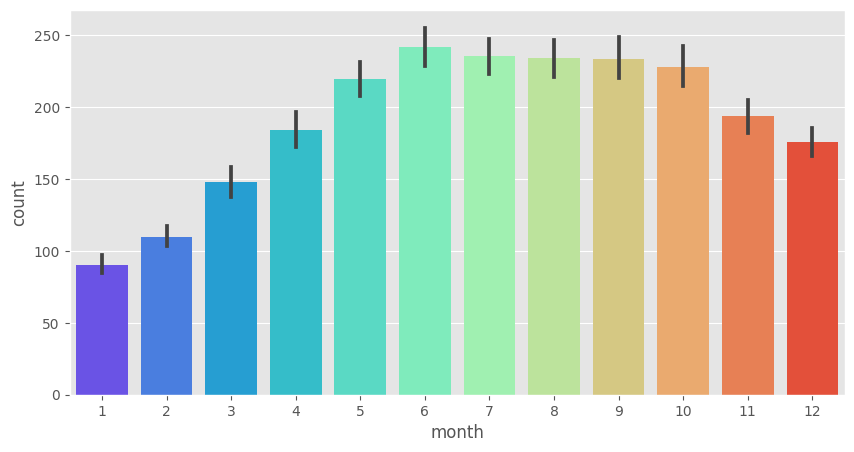

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='month', y = 'count', palette = 'rainbow');

### Demand per hour

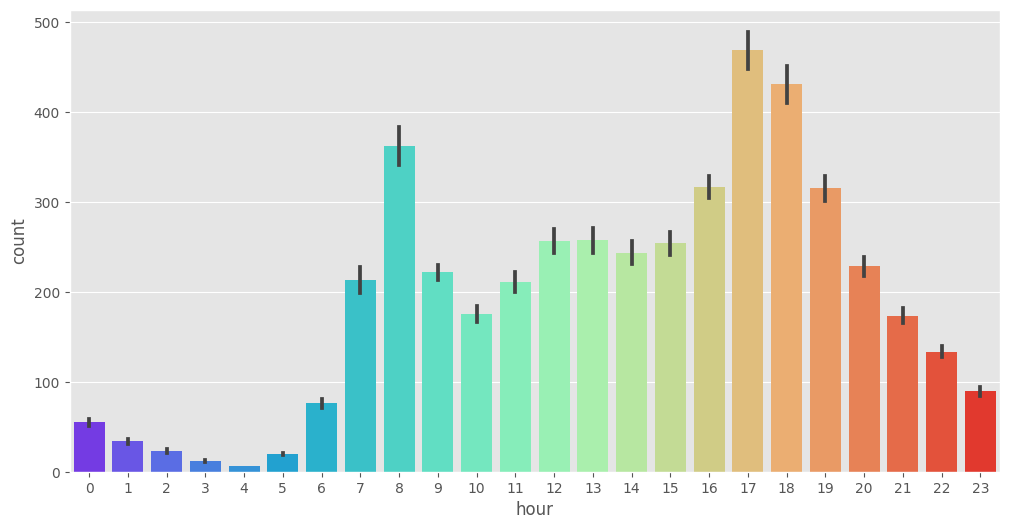

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(data = train, x = 'hour', y = 'count', palette = 'rainbow');

## Demand per season

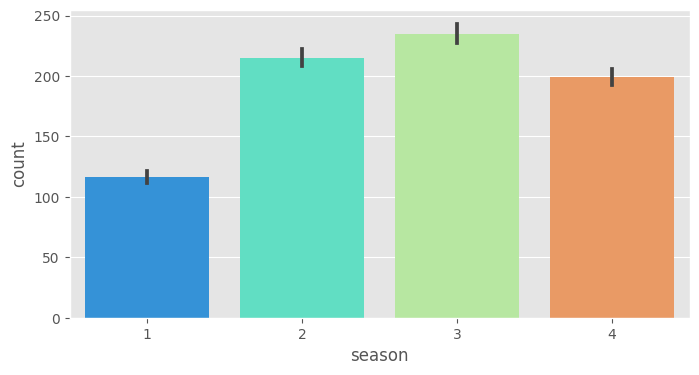

In [49]:
plt.figure(figsize = (8,4))
sns.barplot(data = train, x = 'season', y = 'count', palette = 'rainbow');

## 
Demand as per holidays

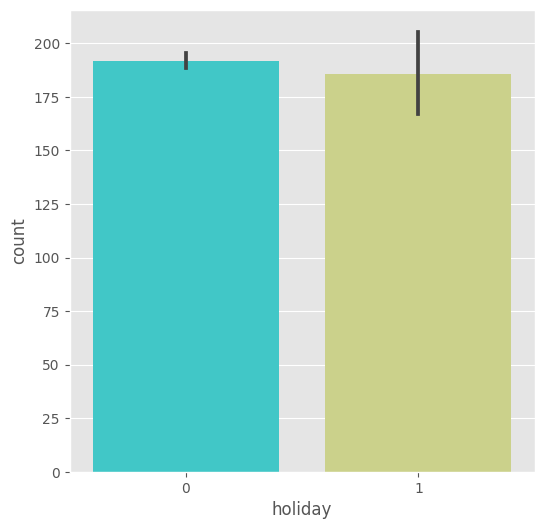

In [50]:
plt.figure(figsize=(6,6))
sns.barplot(data = train, x = 'holiday', y = 'count', palette = 'rainbow');

## Demand on working days

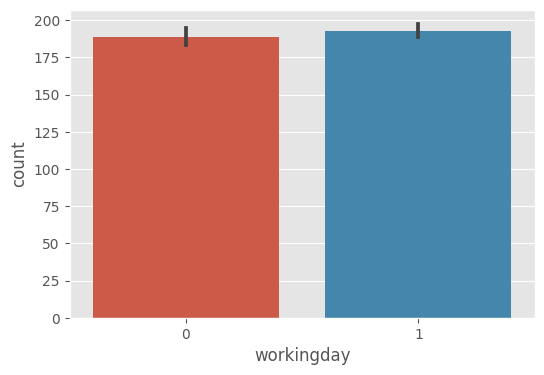

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(data = train, x = 'workingday', y = 'count');

## Demand according to the weather

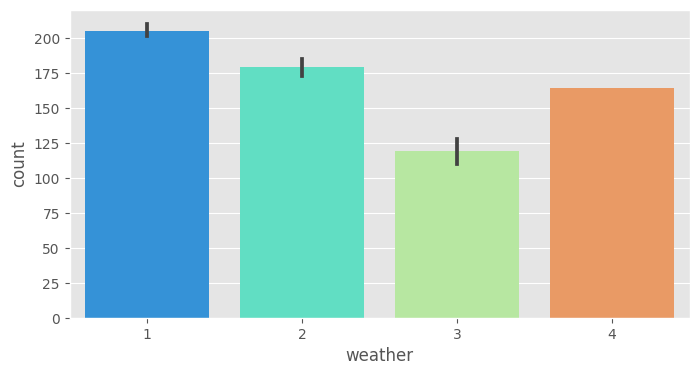

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(data = train, x = 'weather', y = 'count', palette = 'rainbow');

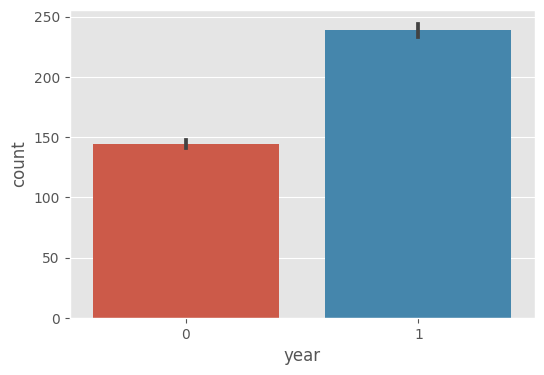

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(data = train, x = 'year', y = 'count');

## Temperature vs Demand

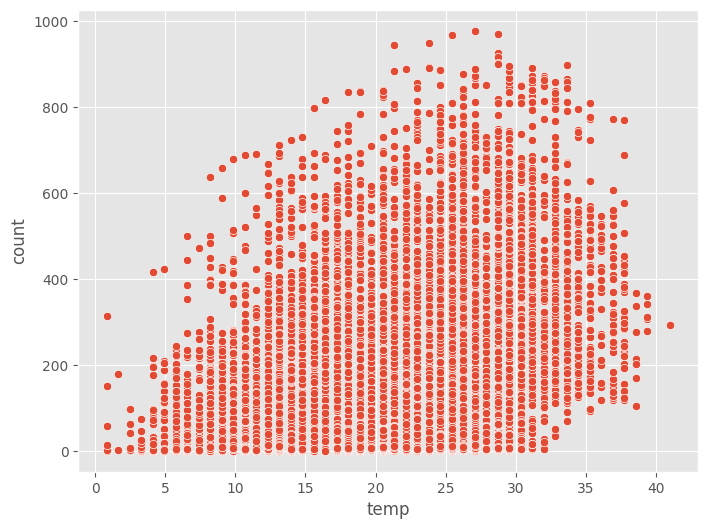

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'temp', y = 'count');

## Demand vs aTemp

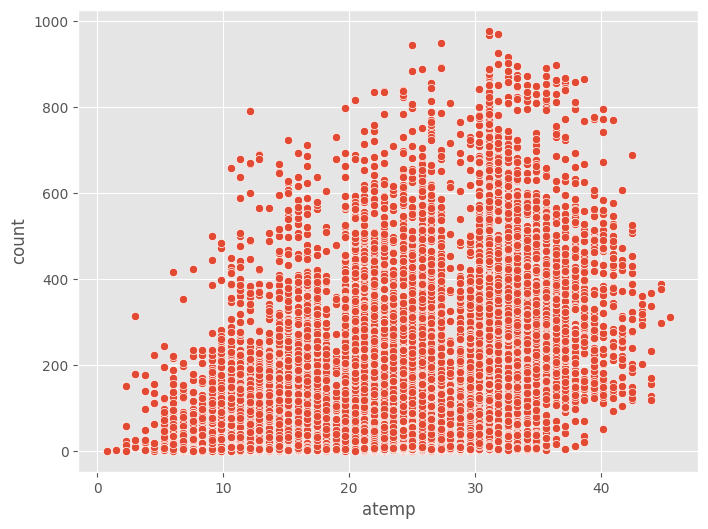

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'atemp', y = 'count');

## Humidity vs Demand

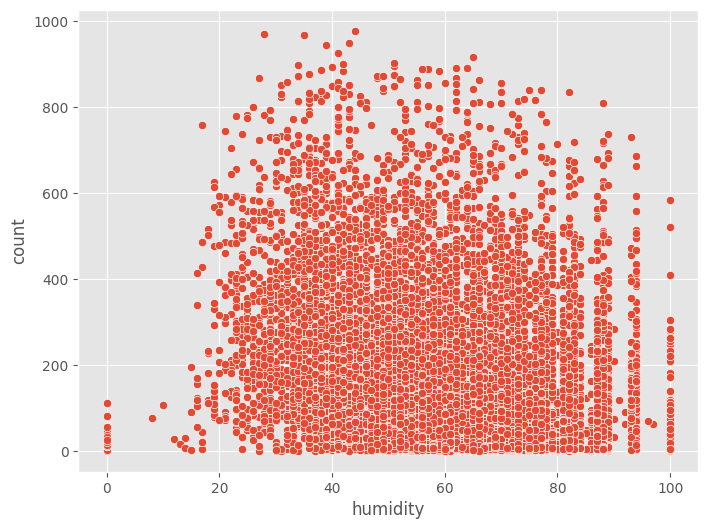

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'humidity', y='count');

## Windspeed vs Demand

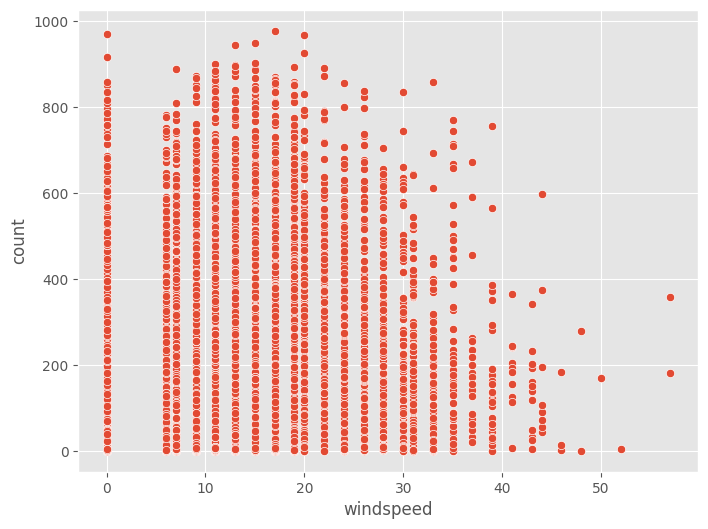

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train, x = 'windspeed', y='count');

In [58]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80,0.0,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80,0.0,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75,0.0,13,0,1,2011-01-01,3,Sat
4,1,0,0,1,9.84,14.395,75,0.0,1,0,1,2011-01-01,4,Sat


## Model Building

In [59]:
train.drop(['atemp','date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [60]:

test.drop(['atemp','date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [61]:
train.head()

,season,holiday,weather,temp,humidity,count,month,hour
0,1,0,1,9.84,81,16,1,0
1,1,0,1,9.02,80,40,1,1
2,1,0,1,9.02,80,32,1,2
3,1,0,1,9.84,75,13,1,3
4,1,0,1,9.84,75,1,1,4


In [62]:
train.tail()

,season,holiday,weather,temp,humidity,count,month,hour
10881,4,0,1,15.58,50,336,12,19
10882,4,0,1,14.76,57,241,12,20
10883,4,0,1,13.94,61,168,12,21
10884,4,0,1,13.94,61,129,12,22
10885,4,0,1,13.12,66,88,12,23


In [63]:
season = pd.get_dummies(train['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train['hour'],prefix='hour',drop_first=True)
train = pd.concat([train,season,weather,holiday,month,hour],axis=1)
train.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)
train.head()

,temp,humidity,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.02,80,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.02,80,32,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.84,75,13,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.84,75,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
season = pd.get_dummies(test['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(test['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(test['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(test['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(test['hour'],prefix='hour',drop_first=True)
test = pd.concat([test,season,weather,holiday,month,hour],axis=1)
test.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)
test.head()

,temp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10.66,56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
X = train.drop('count',axis=1)
y = np.log(train['count'])

In [66]:
X.head()

,temp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.02,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.02,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.84,75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.84,75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## splitting our data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.3,random_state=101)

## Training the Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
#fitting the training data
lm.fit(X_train,y_train)

LinearRegression()

In [72]:
#printing the intercept
print(lm.intercept_)

2.826567104955476


In [73]:
lm.coef_

array([ 3.78347490e-02, -3.74924662e-03,  8.83612642e+09,  7.10960168e+10,
       -1.17725270e+10, -3.86124560e-02, -5.60296373e-01, -2.27273209e+09,
        1.42793722e-02,  1.74248138e-01,  2.26307942e-01, -8.83612642e+09,
       -8.83612642e+09, -8.83612642e+09, -7.10960168e+10, -7.10960168e+10,
       -7.10960168e+10,  1.17725270e+10,  1.17725270e+10,  1.17725270e+10,
       -5.90489354e-01, -1.18994699e+00, -1.71199493e+00, -2.03250053e+00,
       -9.68082640e-01,  2.75219911e-01,  1.29210100e+00,  1.88576195e+00,
        1.54707077e+00,  1.19475309e+00,  1.34769858e+00,  1.51701230e+00,
        1.48526426e+00,  1.36727208e+00,  1.43723997e+00,  1.70555333e+00,
        2.13089605e+00,  2.03079098e+00,  1.76567562e+00,  1.48078736e+00,
        1.22205381e+00,  1.00702640e+00,  5.83989412e-01])

In [74]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])

In [75]:
cdf

,Coefficients
temp,3.783475e-02
humidity,-3.749247e-03
season_2,8.836126e+09
season_3,7.109602e+10
season_4,-1.177253e+10
weather_2,-3.861246e-02
weather_3,-5.602964e-01
weather_4,-2.272732e+09
holiday_1,1.427937e-02
month_2,1.742481e-01


In [76]:
# Predictions
predictions = abs(lm.predict(X_val))

In [77]:
predictions

array([5.81581391, 5.41738022, 3.82624574, ..., 5.12076392, 3.98472575,
       1.26599655])

## Evaluating the regression

In [78]:
from sklearn import metrics

In [79]:
metrics.mean_absolute_error(y_val, predictions)

695876.832268443

In [80]:
metrics.mean_squared_error(y_val,predictions)

1581540442501971.8

In [81]:
# Root Mean Squared Log Error
np.sqrt(metrics.mean_squared_log_error(y_val,predictions))

0.3895421376376641

In [82]:
test_prediction = abs(lm.predict(test))

In [83]:
final_prediction = np.exp(test_prediction)

In [84]:
final_prediction = np.round(final_prediction)

In [85]:
final_prediction

array([ 20.,  11.,   6., ..., 139., 216., 189.])

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [88]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [89]:
predict = dt_reg.predict(X_val)

In [90]:
np.sqrt(metrics.mean_squared_log_error(y_val,predict))

0.22601862326540964

In [91]:
test_predict = dt_reg.predict(test)

In [92]:
final_predict = np.exp(test_predict)

In [93]:
final_predict = np.round(final_predict)

In [94]:
final_predict

array([169.,  22.,  14., ..., 169., 169., 169.])

In [95]:
submission = pd.DataFrame()

In [96]:
submission['count'] = final_predict

In [97]:
submission.to_csv('sample submission.csv',header=True,index=False)

### Thank you